# Instalação de biblioteca

In [1]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.2 MB/s eta 0:00:00


# Importação de bibliotecas

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import mplfinance as mpf
import yfinance as yf

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importar dados
- API Yahoo Finance

In [6]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261333,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       248 non-null    float64
 1   High       248 non-null    float64
 2   Low        248 non-null    float64
 3   Close      248 non-null    float64
 4   Adj Close  248 non-null    float64
 5   Volume     248 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.6 KB


# Manipulação de dados

Renomear as colunas

In [ ]:
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Fech_Ajust','Volume' ]

Renomear index

In [ ]:
dados = dados.rename_axis('Data')

# Visualização com Pandas

Gráfico da variavel "Fechamento"

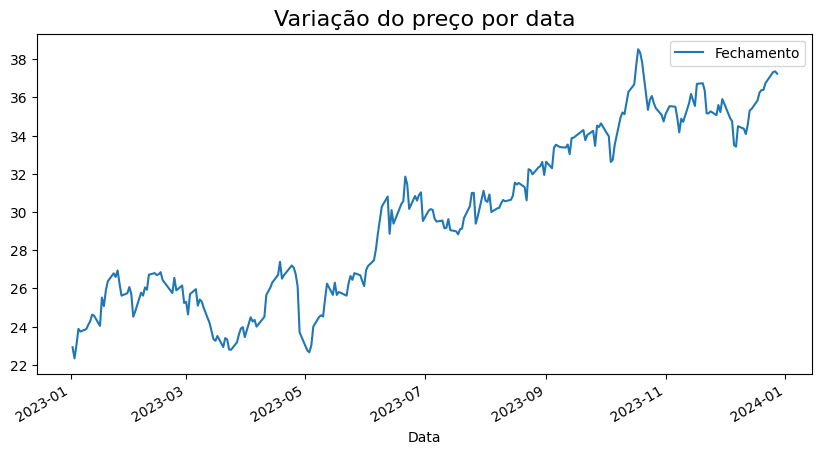

In [ ]:
dados['Fechamento'].plot(figsize=(10,5))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

# Dataframe para análise
Criar dataframe 'df' com 60 registros do dataframe 'dados'

In [ ]:
df = dados.head(60).copy()

Criar coluna 'Data' a partir do index

In [ ]:
df['Data'] = df.index

Tranformar a coluna 'Data' em valor númerico

In [ ]:
df['Data']=df['Data'].apply(mdates.date2num)

# Visualização com Matplotlib

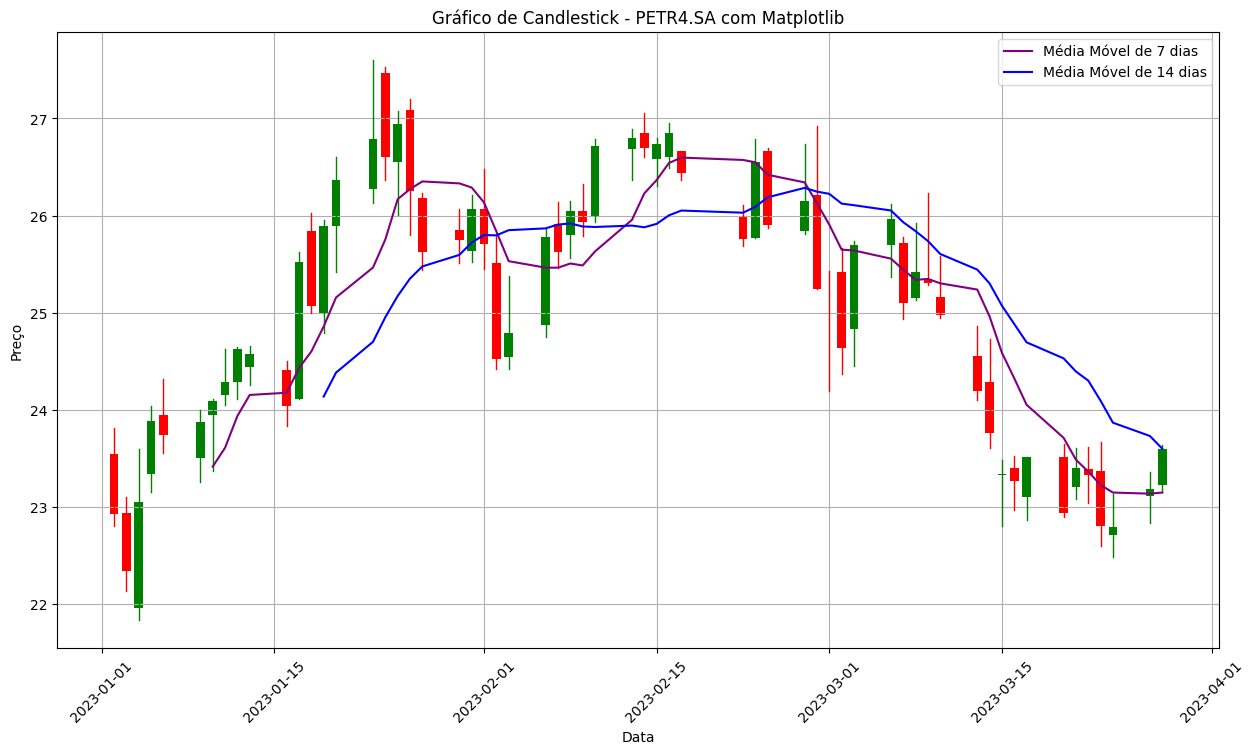

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7

for i in range(len(df)):
  if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
    color='green'
  else:
    color='red'

  ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minimo'].iloc[i], df['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

  ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                             width,
                             abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                             facecolor=color))

df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()

ax.plot(df['Data'], df['MA7'], color='purple', label="Média Móvel de 7 dias")
ax.plot(df['Data'], df['MA14'], color='blue', label="Média Móvel de 14 dias")


ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'));
plt.xticks(rotation=45);

plt.title('Gráfico de Candlestick - PETR4.SA com Matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()

# Visualização com Plotly.graph_objects

In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Canclestick","Volume Transacionado"),
                    row_width=[0.2,0.7])


fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maximo'],
                             low=df['Minimo'],
                             close=df['Fechamento'],
                             name='Candlestick'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                          y=df['MA7'],
                          mode='lines',
                          name='MA7 - Média Móvel 7 dias'),
               row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                          y=df['MA14'],
                          mode='lines',
                          name='MA14 - Média Móvel 14 dias'),
               row=1, col=1)

fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
              row=2, col=1)

fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,
                  width=1100,
                  height=600)
fig.show()

# Visualiação com a API

In [ ]:
dados_api = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


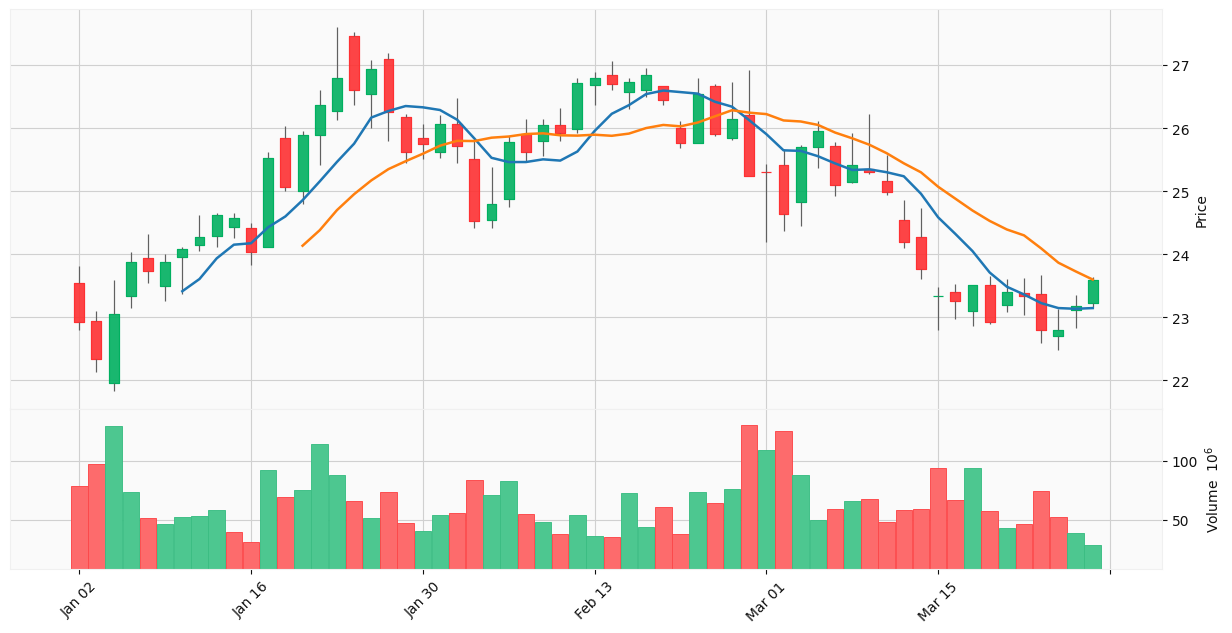

In [ ]:
mpf.plot(dados_api.head(60), type='candle', figsize=(16,8), volume=True, mav=(7,14), style='yahoo')